In [1]:
import pandas as pd
import numpy as np
import copy
import pickle
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_palette("PuBuGn_d")
sns.set_palette("husl")
#sns.set_palette("PuBuGn_d")
plt.rc('font', size=13)      



sys.path.append("/home/alex/Dropbox/smc_hmc/python_smchmc/smc_sampler_functions/")
sys.path.append("/home/alex/Dropbox/smc_hmc/python_smchmc/")
sys.path.append("/home/alex/Dropbox/smc_hmc/python_smchmc/help/")
import smc_sampler_functions.proposal_kernels
#path = os.getcwd()
#path = path.replace("/ipython_notebooks","")
#path = "/home/alex/inter_simulation_results/hsmc_harvard/results_simulation_mix_normal"
path = "/media/alex/Transcend/hsmc/results_simulation_normal_mix"
#path = "/home/alex/Dropbox/smc_hmc/python_smchmc/results_simulation_normal_mix/"


os.chdir(path)
names_files_list = os.listdir(path)
print(names_files_list)
#import getsize_function

['normal_mixsampler_HMC_L_random_ft_adaptive_rep_0_dim_10.p', 'normal_mixsampler_HMC_L_random_ft_adaptive_rep_0_dim_15.p', 'normal_mixsampler_HMC_L_random_ft_adaptive_rep_0_dim_2.p', 'normal_mixsampler_HMC_L_random_ft_adaptive_rep_0_dim_20.p', 'normal_mixsampler_HMC_L_random_ft_adaptive_rep_0_dim_25.p', 'normal_mixsampler_HMC_L_random_ft_adaptive_rep_0_dim_5.p', 'normal_mixsampler_HMC_L_random_ft_adaptive_rep_10_dim_10.p', 'normal_mixsampler_HMC_L_random_ft_adaptive_rep_10_dim_15.p', 'normal_mixsampler_HMC_L_random_ft_adaptive_rep_10_dim_2.p', 'normal_mixsampler_HMC_L_random_ft_adaptive_rep_10_dim_20.p', 'normal_mixsampler_HMC_L_random_ft_adaptive_rep_10_dim_5.p', 'normal_mixsampler_HMC_L_random_ft_adaptive_rep_11_dim_10.p', 'normal_mixsampler_HMC_L_random_ft_adaptive_rep_11_dim_15.p', 'normal_mixsampler_HMC_L_random_ft_adaptive_rep_11_dim_2.p', 'normal_mixsampler_HMC_L_random_ft_adaptive_rep_11_dim_20.p', 'normal_mixsampler_HMC_L_random_ft_adaptive_rep_11_dim_25.p', 'normal_mixsampler

In [2]:
dim_list = [2, 5, 10, 15, 20, 25, 30]
dim_list = [5, 10, 15, 20]
dim_len = len(dim_list)
M =  30
names_samplers = ["sampler_HMC_L_random_ours_adaptive_", "sampler_HMC_L_random_ft_adaptive_","sampler_MALA_", "sampler_RW_"]
names_prop = ['HMCAPR', 'HMCAFT', 'MALA', 'RW']
num_sampler = len(names_samplers)
norm_const = np.zeros((M, num_sampler, dim_len))
prob_positive = np.zeros((M, num_sampler, dim_len))
#trace_var_particles = np.zeros((M, num_sampler, dim_len))
computational_load = np.zeros((M, num_sampler, dim_len))


In [3]:
for i_dim, dim in enumerate(dim_list):
    for m_rep in range(M):
        for i, name_sampler in enumerate(names_samplers):
            name_to_load = "normal_mix"+name_sampler+"rep_%s_dim_%s.p"%(m_rep+1, dim)
            res_dict = pickle.load(open(name_to_load, 'rb'))
            norm_const[m_rep, i, i_dim] = sum(res_dict['Z_list'])**2
            prob_positive[m_rep, i, i_dim] = ((res_dict['particles_resampled']>0).mean()-res_dict['parameters']['proportion'])**2
            #trace_var_particles[m_rep, i, i_dim] = res_dict['particles_resampled'].var(axis=1).mean()
            if 'PR' in names_prop[i]:
                computational_load[m_rep, i, i_dim] = len(res_dict['temp_list'])* res_dict['L_mean'].mean()+(np.unique(res_dict['temp_list'])).shape[0]*50
            else: 
                computational_load[m_rep, i, i_dim] = len(res_dict['temp_list'])* res_dict['L_mean'].mean()

In [9]:
name_to_load = "normal_mix"+names_samplers[0]+"rep_%s_dim_%s.p"%(m_rep+1, dim)
res_dict = pickle.load(open(name_to_load, 'rb'))

#res_dict['proposal_kernel']['L_steps']

In [6]:
frame_all_list = []
for i, name in enumerate(names_prop):
    for i_dim, dim in enumerate(dim_list):
        frame1 = pd.DataFrame({ "error" : prob_positive[:,i,i_dim], 'sampler':name })
        frame1['dimension'] = dim
        frame_all_list.append(frame1)

In [7]:
frame_all = pd.concat(frame_all_list)

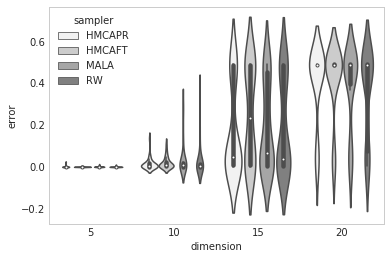

In [8]:
sns.violinplot(x='dimension', y='error', hue='sampler', data=frame_all, fontsize=18, color='gray')#palette="muted")
plt.savefig('violinplot_mixnormal.pdf'); plt.show()

(30, 4, 5)


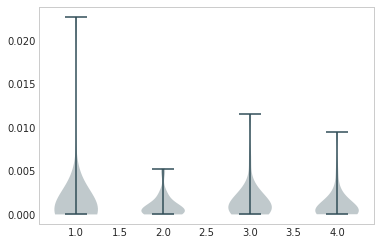

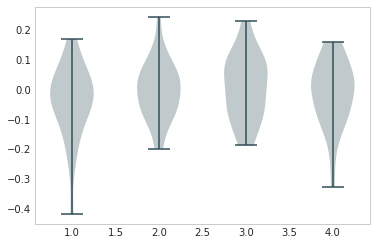

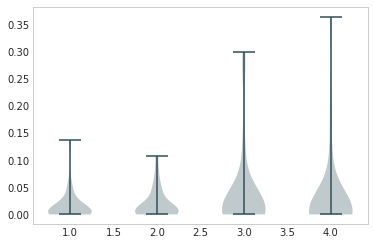

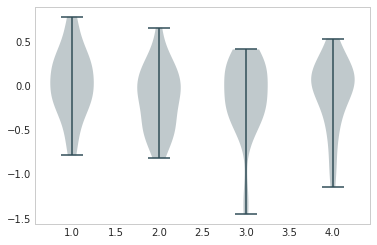

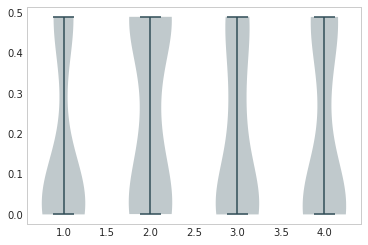

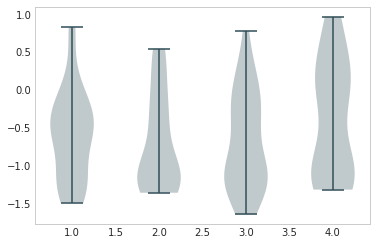

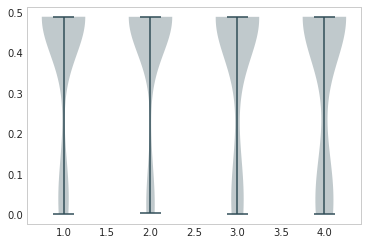

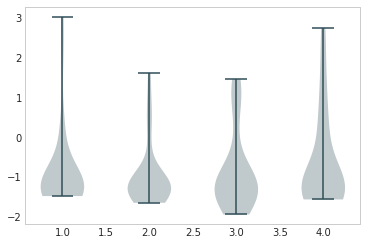

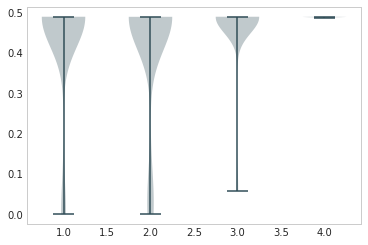

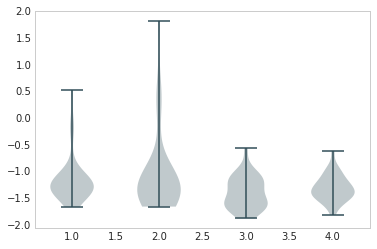

In [11]:
print prob_positive.shape
for i in range(dim_len):
    plt.violinplot(prob_positive[:,:,i] ); plt.show()
    plt.violinplot(norm_const[:,:,i] ); plt.show()
#plt.boxplot([prob_positive[:,i,:] for i, dim in enumerate(dim_list)]); plt.show()

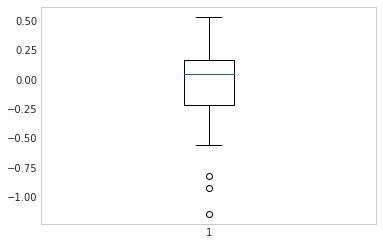

In [16]:
prob_positive.mean(axis=0)
(res_dict['particles_resampled']>0).mean()
plt.boxplot(norm_const[:,3,1]); plt.show()

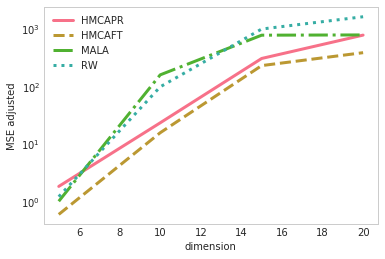

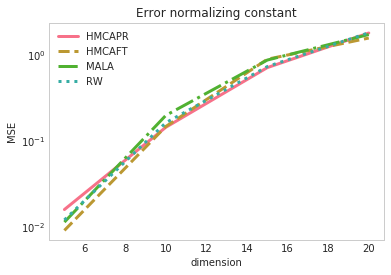

In [5]:
linestyles = ['-', '--', '-.', ':']
#plt.title('Recovered modes times computational budget')
for i, linestyle in enumerate(linestyles):
    plt.plot(dim_list, ((prob_positive).mean(axis=0)*computational_load.mean(axis=0)).transpose()[:,i], linestyle=linestyle, linewidth=3)
    #plt.plot(dim_list, ((prob_positive).mean(axis=0)).transpose()[:,i], linestyle=linestyle)
plt.yscale('log')
plt.legend(names_prop)
plt.xlabel("dimension")
plt.ylabel("MSE adjusted")
plt.savefig("normal_mix_computation_sign.pdf")
plt.show()


linestyles = ['-', '--', '-.', ':']
plt.title('Error normalizing constant')
for i, linestyle in enumerate(linestyles):
    plt.plot(dim_list, ((norm_const).mean(axis=0)).transpose()[:,i], linestyle=linestyle, linewidth=3)
    #plt.plot(dim_list, ((prob_positive).mean(axis=0)).transpose()[:,i], linestyle=linestyle)
plt.yscale('log')
plt.legend(names_prop)
plt.xlabel("dimension")
plt.ylabel("MSE")
plt.savefig("normal_mix_computation_normconst.pdf")
plt.show()

In [21]:
norm_const.shape

(30, 4, 5)

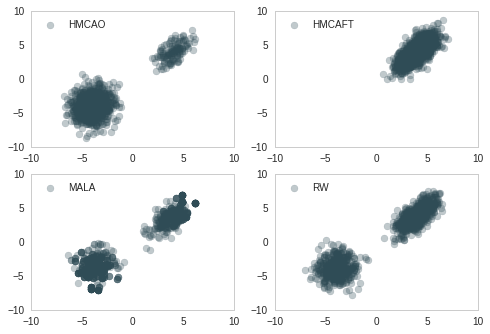

In [25]:
dim= 15
plt.figure()
plt.title("Recovered modes")
for i, name_sampler in enumerate(names_samplers):
    name_to_load = "normal_mix"+name_sampler+"rep_%s_dim_%s.p"%(m_rep, dim)
    res_dict = pickle.load(open(name_to_load, 'rb'))
    plt.subplot(2,2,i+1)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.scatter(x=res_dict['particles_resampled'][:,0], y=res_dict['particles_resampled'][:,-1], alpha=0.3, label=names_prop[i])
    plt.legend()
plt.savefig("normal_mix_recovered_modes_%s.png"%dim)
plt.show()

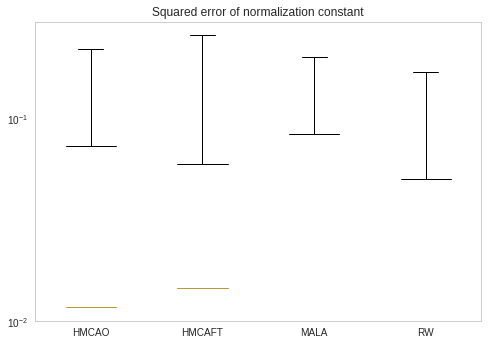

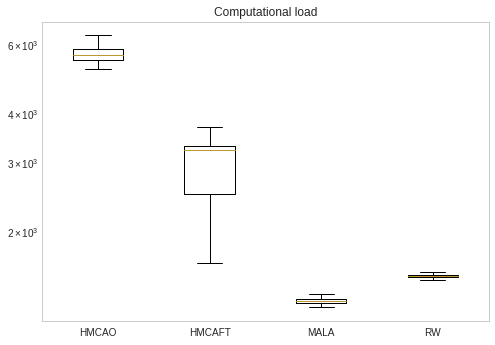

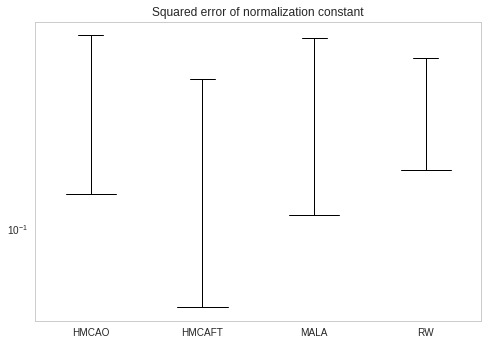

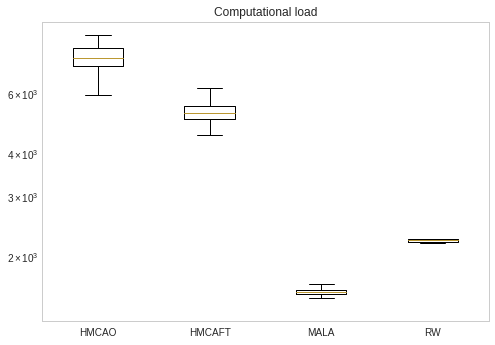

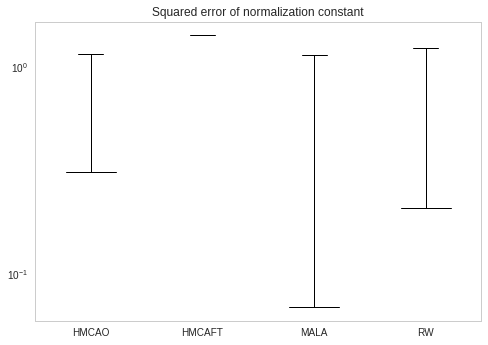

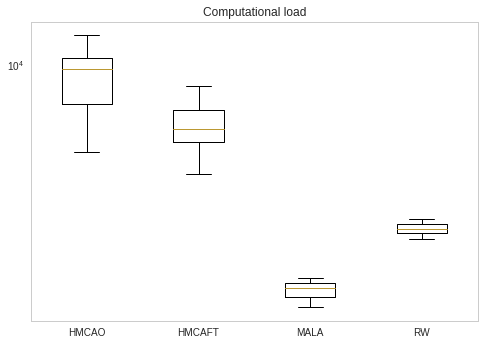

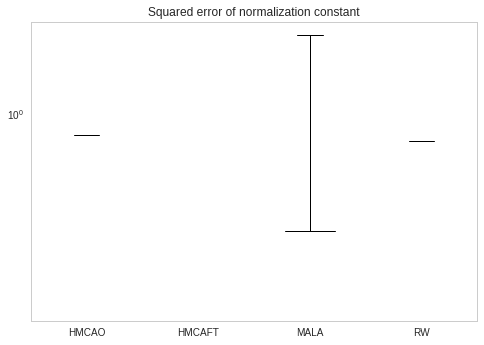

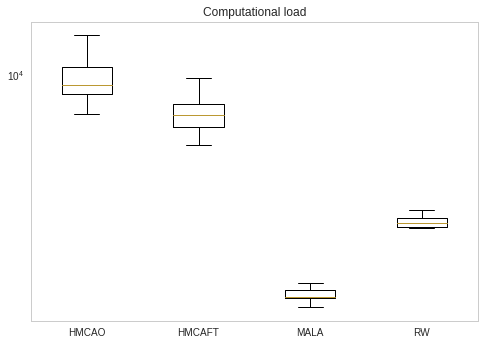

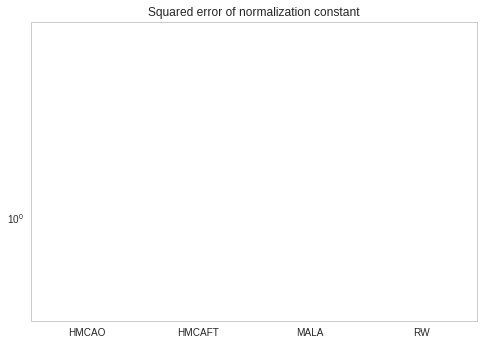

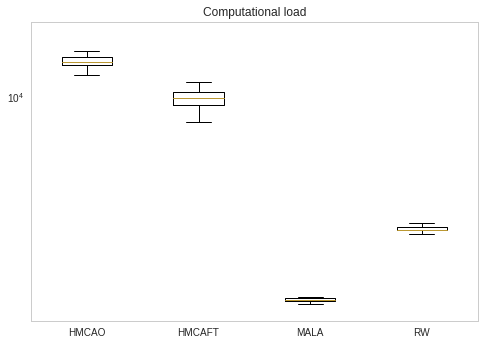

In [25]:
for i_dim, dim in enumerate(dim_list):
    plt.title('Squared error of normalization constant')
    plt.boxplot(norm_const[:,:,i_dim], labels=names_prop); plt.yscale('log')
    plt.savefig('norm_const_mix_normal_dim_%s.png'%dim); plt.show()
    if False: 
        plt.title('Squared error of the mean')
        plt.boxplot(trace_mean_particles[:,:,i_dim], labels=names_prop); plt.yscale('log')
        plt.savefig('error_mean_mix_normal_dim_%s.png'%dim); plt.show()

        plt.title('Squared error of the variance')
        plt.boxplot(trace_var_particles[:,:,i_dim], labels=names_prop); plt.yscale('log')
        plt.savefig('error_variance_mix_normal_dim_%s.png'%dim); plt.show()

    plt.title('Computational load')
    plt.boxplot(computational_load[:,:,i_dim], labels=names_prop); plt.yscale('log')
    plt.savefig('comp_load_mix_normal_dim_%s.png'%dim); plt.show()
